In [72]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-poster')
%matplotlib inline

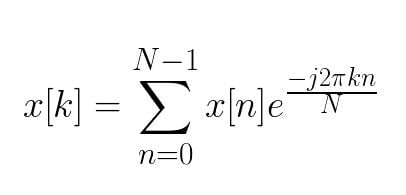

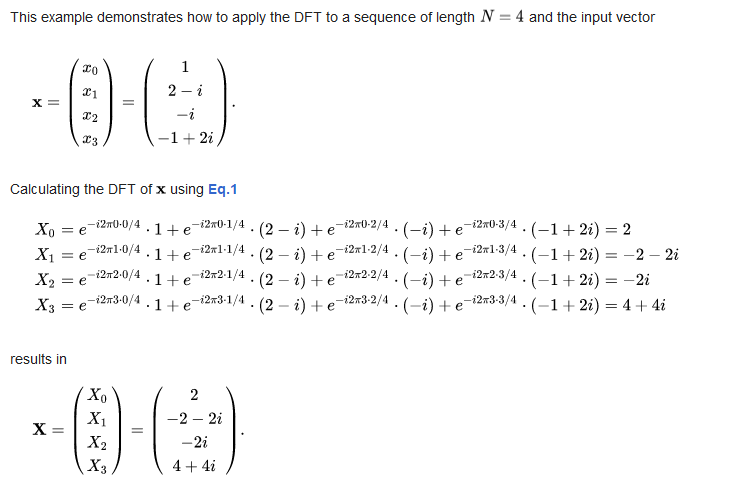

NOTA COME OGNI ELEMENTO DELLA SEQUENZA "TRASFORMATA" HA DENTRO OGNI ELEMENTO DELLA SEQUENZA DA TRASFORMARE
\par
il punto è che, come si vede dall'immagine, per fare sta roba ho calcolato $4×4=n^2$ esponenziali

In [14]:
x=[1,2,3,4]
x = np.asarray(x, dtype=float)
N = x.shape[0] #numero di x
n = np.arange(N) #sequenza di numeri interi da 0 a N-1
k = n.reshape((N, 1)) #trasformo in un array verticale
M = np.exp(-2j * np.pi * k * n / N) #n e k sono vettori e quindi moltiplicarli significa moltiplicare un vettore 4x1 con uno 1x4
M.shape
print(M,k,n,k*n,x,np.dot(M,x))


[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
  -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00-1.2246468e-16j
   1.0000000e+00+2.4492936e-16j -1.0000000e+00-3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
  -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]] [[0]
 [1]
 [2]
 [3]] [0 1 2 3] [[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]] [1. 2. 3. 4.] [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [15]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0] #numero di x
    n = np.arange(N) #sequenza di numeri interi da 0 a N-1
    k = n.reshape((N, 1)) #trasformo in un array verticale
    M = np.exp(-2j * np.pi * k * n / N) #n e k sono vettori e quindi moltiplicarli significa moltiplicare un vettore 4x1 con uno 1x4
    return np.dot(M, x) #moltiplico matrice 4x4 per vettore 1x4

In [50]:
A= [[1, 2, 3, 4], 
    [5, 6, 7, 8]]
B= [[9,10],
    [11,12],
    [13,14],
    [15,16]]
type(A)
range(len(A))
range(len(A[0]))

range(0, 4)

In [46]:
buckets = [[0 for col in range(len(B[0]))] for row in range(len(A))]
buckets


[[0, 0], [0, 0]]

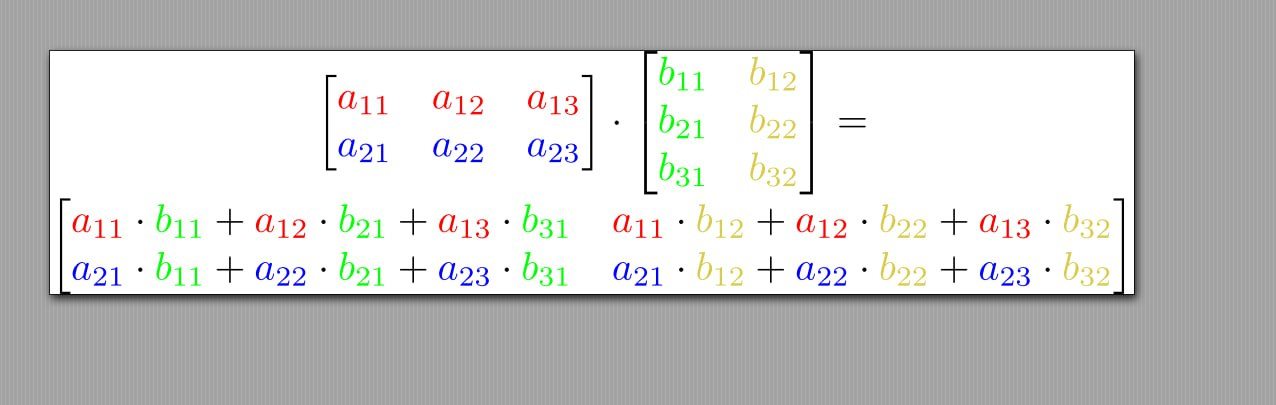

In [48]:
for i in range(len(A)):
    print(i, "sono in a",A[i])
    for j in range(len(B[0])):
        print(j, "sono in B",B[j])
        for k in range(len(A[0])):
            print(k,"sono in A de nuevo",A[i][k])
            buckets[i][j]+=A[i][k]*B[k][j]
buckets
    

0 sono in a [1, 2, 3, 4]
0 sono in B [9, 10]
0 sono in A de nuevo 1
1 sono in A de nuevo 2
2 sono in A de nuevo 3
3 sono in A de nuevo 4
1 sono in B [11, 12]
0 sono in A de nuevo 1
1 sono in A de nuevo 2
2 sono in A de nuevo 3
3 sono in A de nuevo 4
1 sono in a [5, 6, 7, 8]
0 sono in B [9, 10]
0 sono in A de nuevo 5
1 sono in A de nuevo 6
2 sono in A de nuevo 7
3 sono in A de nuevo 8
1 sono in B [11, 12]
0 sono in A de nuevo 5
1 sono in A de nuevo 6
2 sono in A de nuevo 7
3 sono in A de nuevo 8


[[260, 280], [322, 348]]

In [53]:
def matrixmult(A,B):
    if len(A[0])!=len(B):
        raise ValueError("cannot multiply these matrices due to dimensions, idiot")
    res=[[0 for col in range(len(B[0]))] for row in range(len(A))] #creating a empty matrix
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(A[0])):
                res[i][j]+=A[i][k]*B[k][j]
    return res

In [54]:
matrixmult(A,B)

[[130, 140], [322, 348]]

In [73]:
c=list(range(0,len(A[0])))
[[it] for it in c]
M = [[0 for col in range(4)] for row in range(4)] #matrice di 0
    #^this IDIOT just made a twiddle factor matrix
M
for i in range(4):
        for j in range(4):
            M[i][j]=np.exp(-2j*np.pi*i*j/4)
M

[[np.complex128(1+0j),
  np.complex128(1+0j),
  np.complex128(1+0j),
  np.complex128(1+0j)],
 [np.complex128(1+0j),
  np.complex128(6.123233995736766e-17-1j),
  np.complex128(-1-1.2246467991473532e-16j),
  np.complex128(-1.8369701987210297e-16+1j)],
 [np.complex128(1+0j),
  np.complex128(-1-1.2246467991473532e-16j),
  np.complex128(1+2.4492935982947064e-16j),
  np.complex128(-1-3.6739403974420594e-16j)],
 [np.complex128(1+0j),
  np.complex128(-1.8369701987210297e-16+1j),
  np.complex128(-1-3.6739403974420594e-16j),
  np.complex128(5.51091059616309e-16-1j)]]

In [81]:
def my_dft(x):
    N = len(x) #numero di x
    n = list(range(0,N)) #sequenza di numeri interi da 0 a N-1
    k = [[item] for item in n] #trasformo in un array verticale
    M = [[0 for col in range(N)] for row in range(N)] #matrice di 0
    #^this IDIOT just made a twiddle factor matrix
    for i in range(len(n)):
        for j in range(len(k[0])):
            M[i][j]=np.exp(-2j*np.pi*i*j/N)
    return matrixmult(M,x) #moltiplico matrice 4x4 per vettore 1x4

In [16]:
dft([1,2,3,4])

array([10.+0.00000000e+00j, -2.+2.00000000e+00j, -2.-9.79717439e-16j,
       -2.-2.00000000e+00j])

In [82]:
x=[1,2,3,4]
my_dft(x)

TypeError: object of type 'int' has no len()

In [17]:
def fft_base(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("must be a power of 2")
    elif N <= 2:
        return dft(x) #ma perchè chiami la funzione??? Non ti conveniva direttamente fare come facevi con gli altri?
    else:
        X_even = fft_base(x[::2])
        X_odd = fft_base(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])

Questa qui sotto mi piace di più, mi sembra fatta un po' meglio anche se quella sopra è più chiara.

In [18]:
def FFT(x):
    """
    A recursive implementation of
    the 1D Cooley-Tukey FFT, the
    input should have a length of
    power of 2.
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)

        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

In [19]:
fft_base([1,2,3,4,55,22,44,51])

array([182.        +0.00000000e+00j, -34.90811691+8.83761543e+01j,
         9.        +3.10000000e+01j, -73.09188309+6.37615434e+00j,
        24.        -9.67470971e-15j, -73.09188309-6.37615434e+00j,
         9.        -3.10000000e+01j, -34.90811691-8.83761543e+01j])

In [20]:
FFT([1,2,3,4,55,22,44,51])

array([182.        +0.00000000e+00j, -34.90811691+8.83761543e+01j,
         9.        +3.10000000e+01j, -73.09188309+6.37615434e+00j,
        24.        -9.67470971e-15j, -73.09188309-6.37615434e+00j,
         9.        -3.10000000e+01j, -34.90811691-8.83761543e+01j])

In [31]:
#%timeit fft_base([1,2,3,4,55,22,44,51])
%timeit FFT([1,2,3,4,55,22,44,51])
%timeit dft([1,2,3,4,55,22,44,51])

73.4 μs ± 1.41 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
15.4 μs ± 248 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


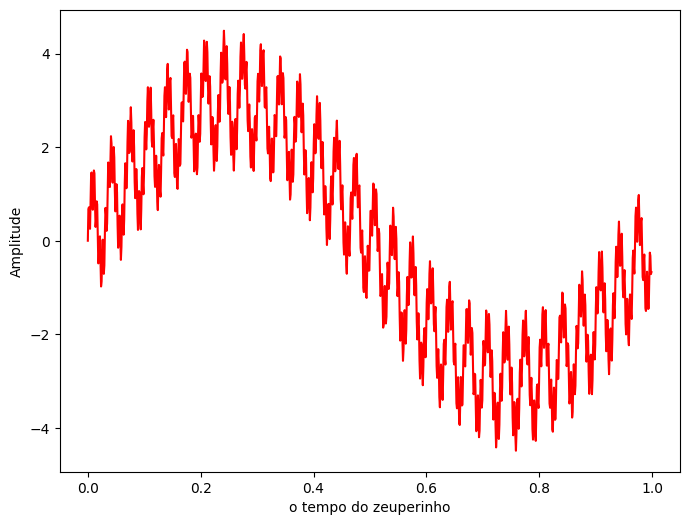

In [22]:
# sampling rate
sr = 1024
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 30
x += np.sin(2*np.pi*freq*t)

freq = 200
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('o tempo do zeuperinho')

plt.show()

TRY IT! Use the FFT function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both the two-sided and one-side frequencies.

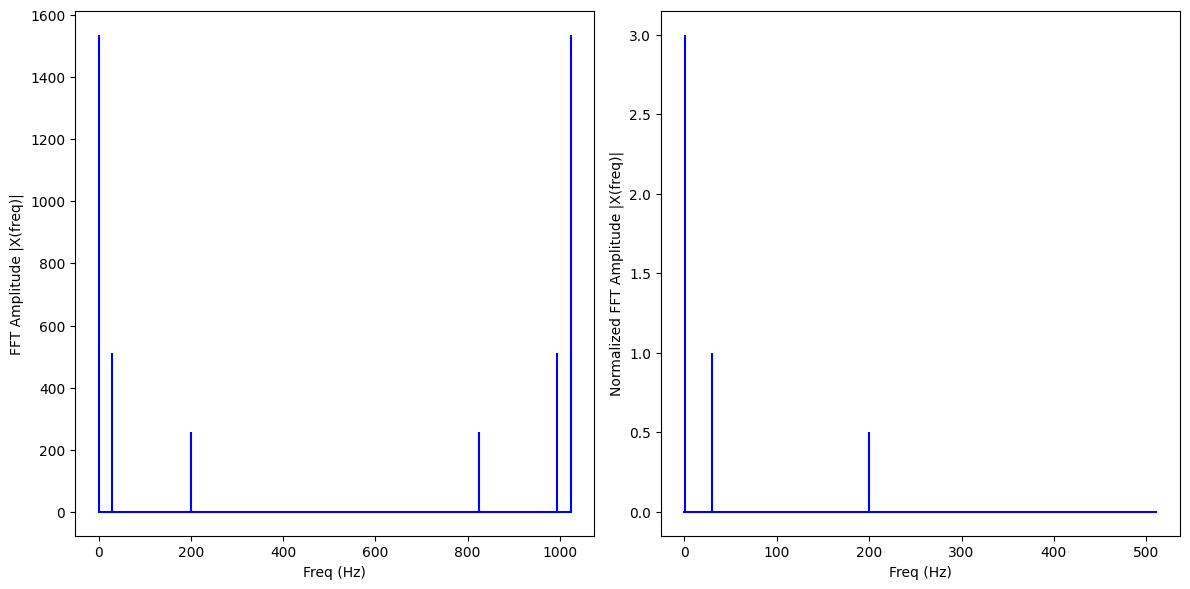

In [23]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

TRY IT! Generate a simple signal for length 2048, and time how long it will run the FFT and compare the speed with the DFT.

In [24]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [25]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

31.6 ms ± 548 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
